In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
#plt.style.use('dark_background')

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# For division
from __future__ import division

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
import pandas_datareader as pdr

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN','RKLB','SOFI','MTTR']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(stock,start,end)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,166.980559,168.631793,165.599403,167.205219,166.702037,6.193635e+07
std,18.570235,18.393531,18.736036,18.554104,18.706941,1.878356e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,151.235001,153.434998,150.324997,151.824997,151.031548,4.951520e+07
50%,172.259995,173.669998,170.970001,172.570007,172.173172,5.745070e+07
75%,180.080002,181.665001,178.089996,180.139999,179.781715,6.912690e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-25 to 2023-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

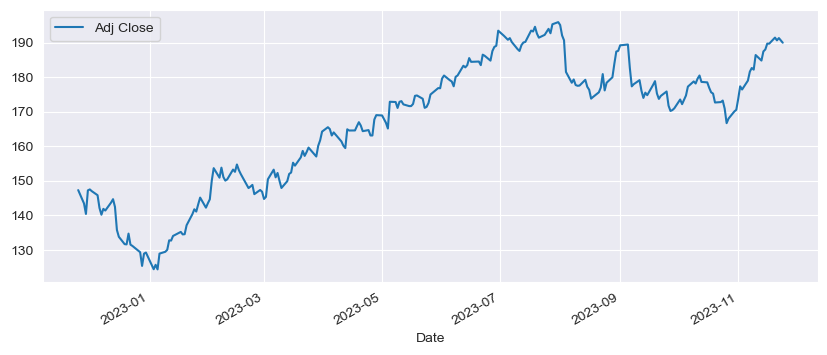

In [6]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

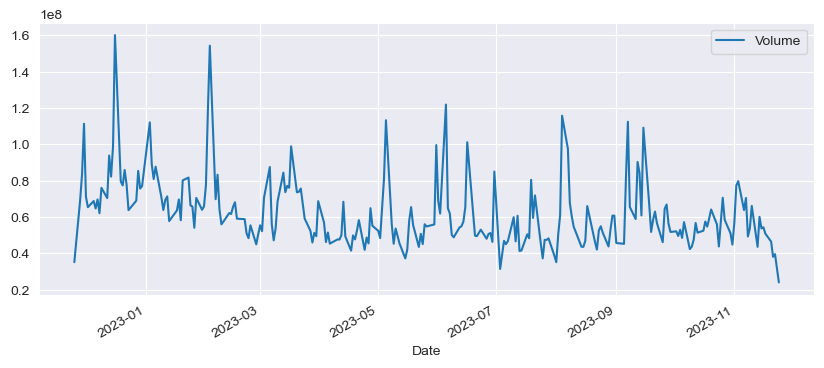

In [7]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [8]:
#calculating the moving average for 10,20,50 days
ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()    

<Axes: xlabel='Date'>

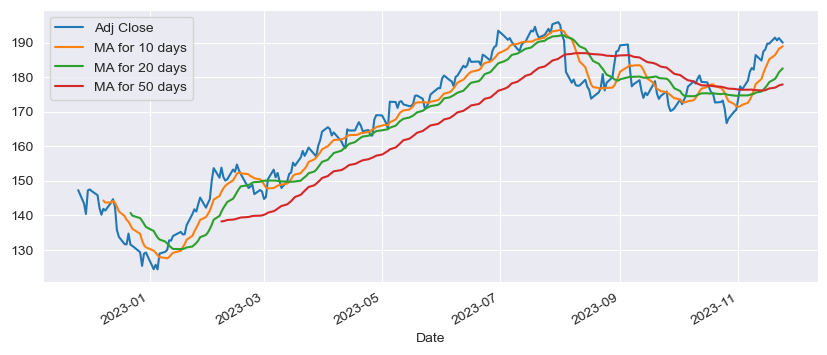

In [9]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

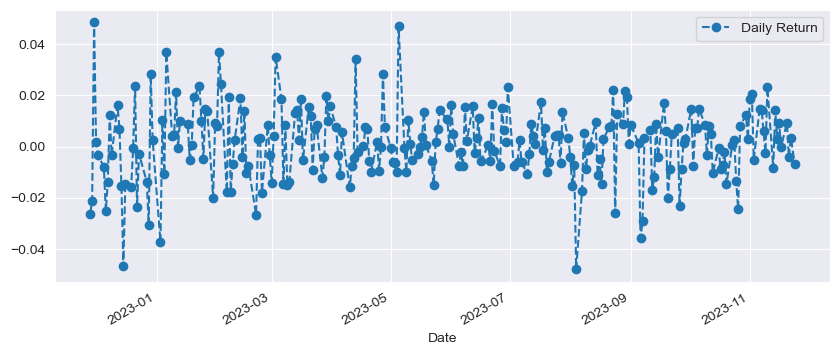

In [10]:
#create daily return using the pct_change function against the daily adjusted close
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

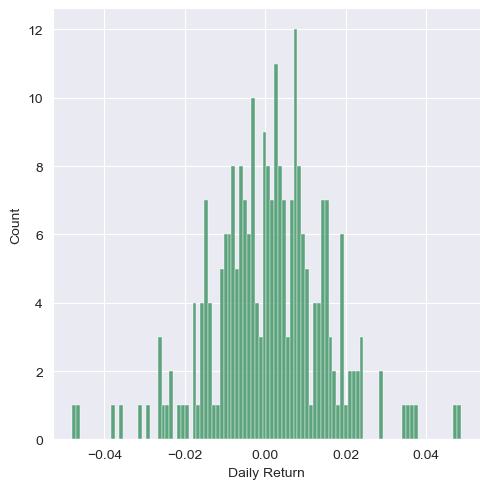

In [11]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='seagreen')

<Axes: >

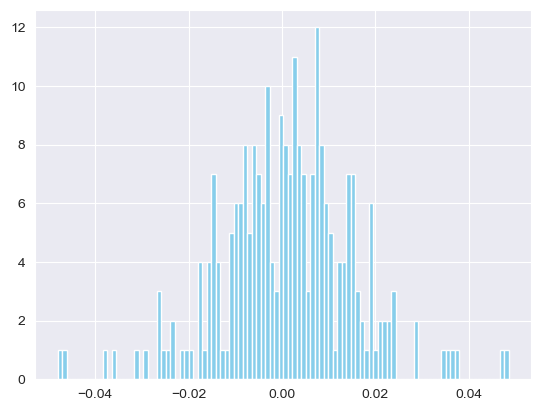

In [12]:
AAPL['Daily Return'].hist(bins=100, color = 'skyblue')

In [13]:
closing_df = yf.download(tech_list,start,end)['Adj Close']

[*********************100%%**********************]  7 of 7 completed


In [14]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT,MTTR,RKLB,SOFI
Date,,,,,,,
2022-11-25,147.286728,93.410004,97.599998,245.314819,3.27,4.18,4.60
2022-11-28,143.418365,93.949997,96.250000,239.635162,3.11,4.01,4.45
2022-11-29,140.385315,92.419998,95.440002,238.217758,3.00,3.96,4.56
2022-11-30,147.207169,96.540001,101.449997,252.897583,3.15,4.19,4.83
2022-12-01,147.485626,95.500000,101.279999,252.451538,3.28,4.22,4.74


In [15]:
tech_rets = closing_df.pct_change()

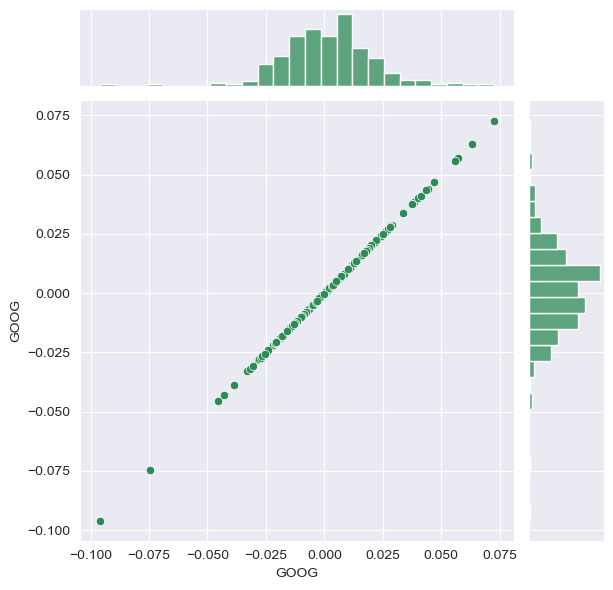

In [16]:
sns.jointplot(tech_rets,x='GOOG',y='GOOG',kind='scatter',color='seagreen')

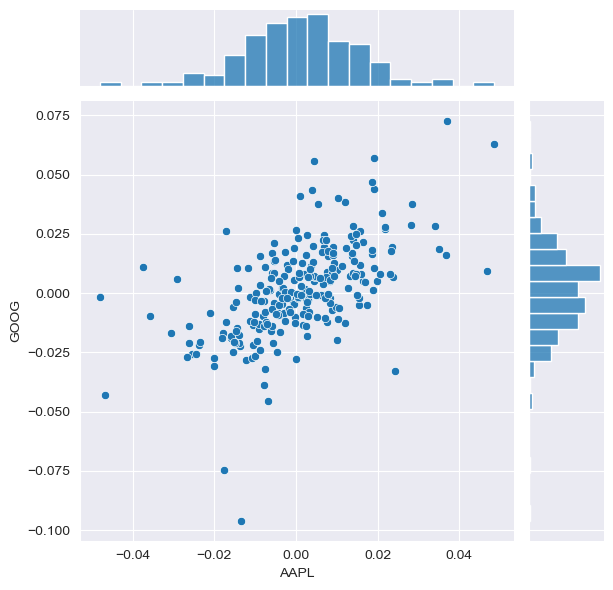

In [17]:
sns.jointplot(tech_rets,x='AAPL',y='GOOG',kind='scatter')

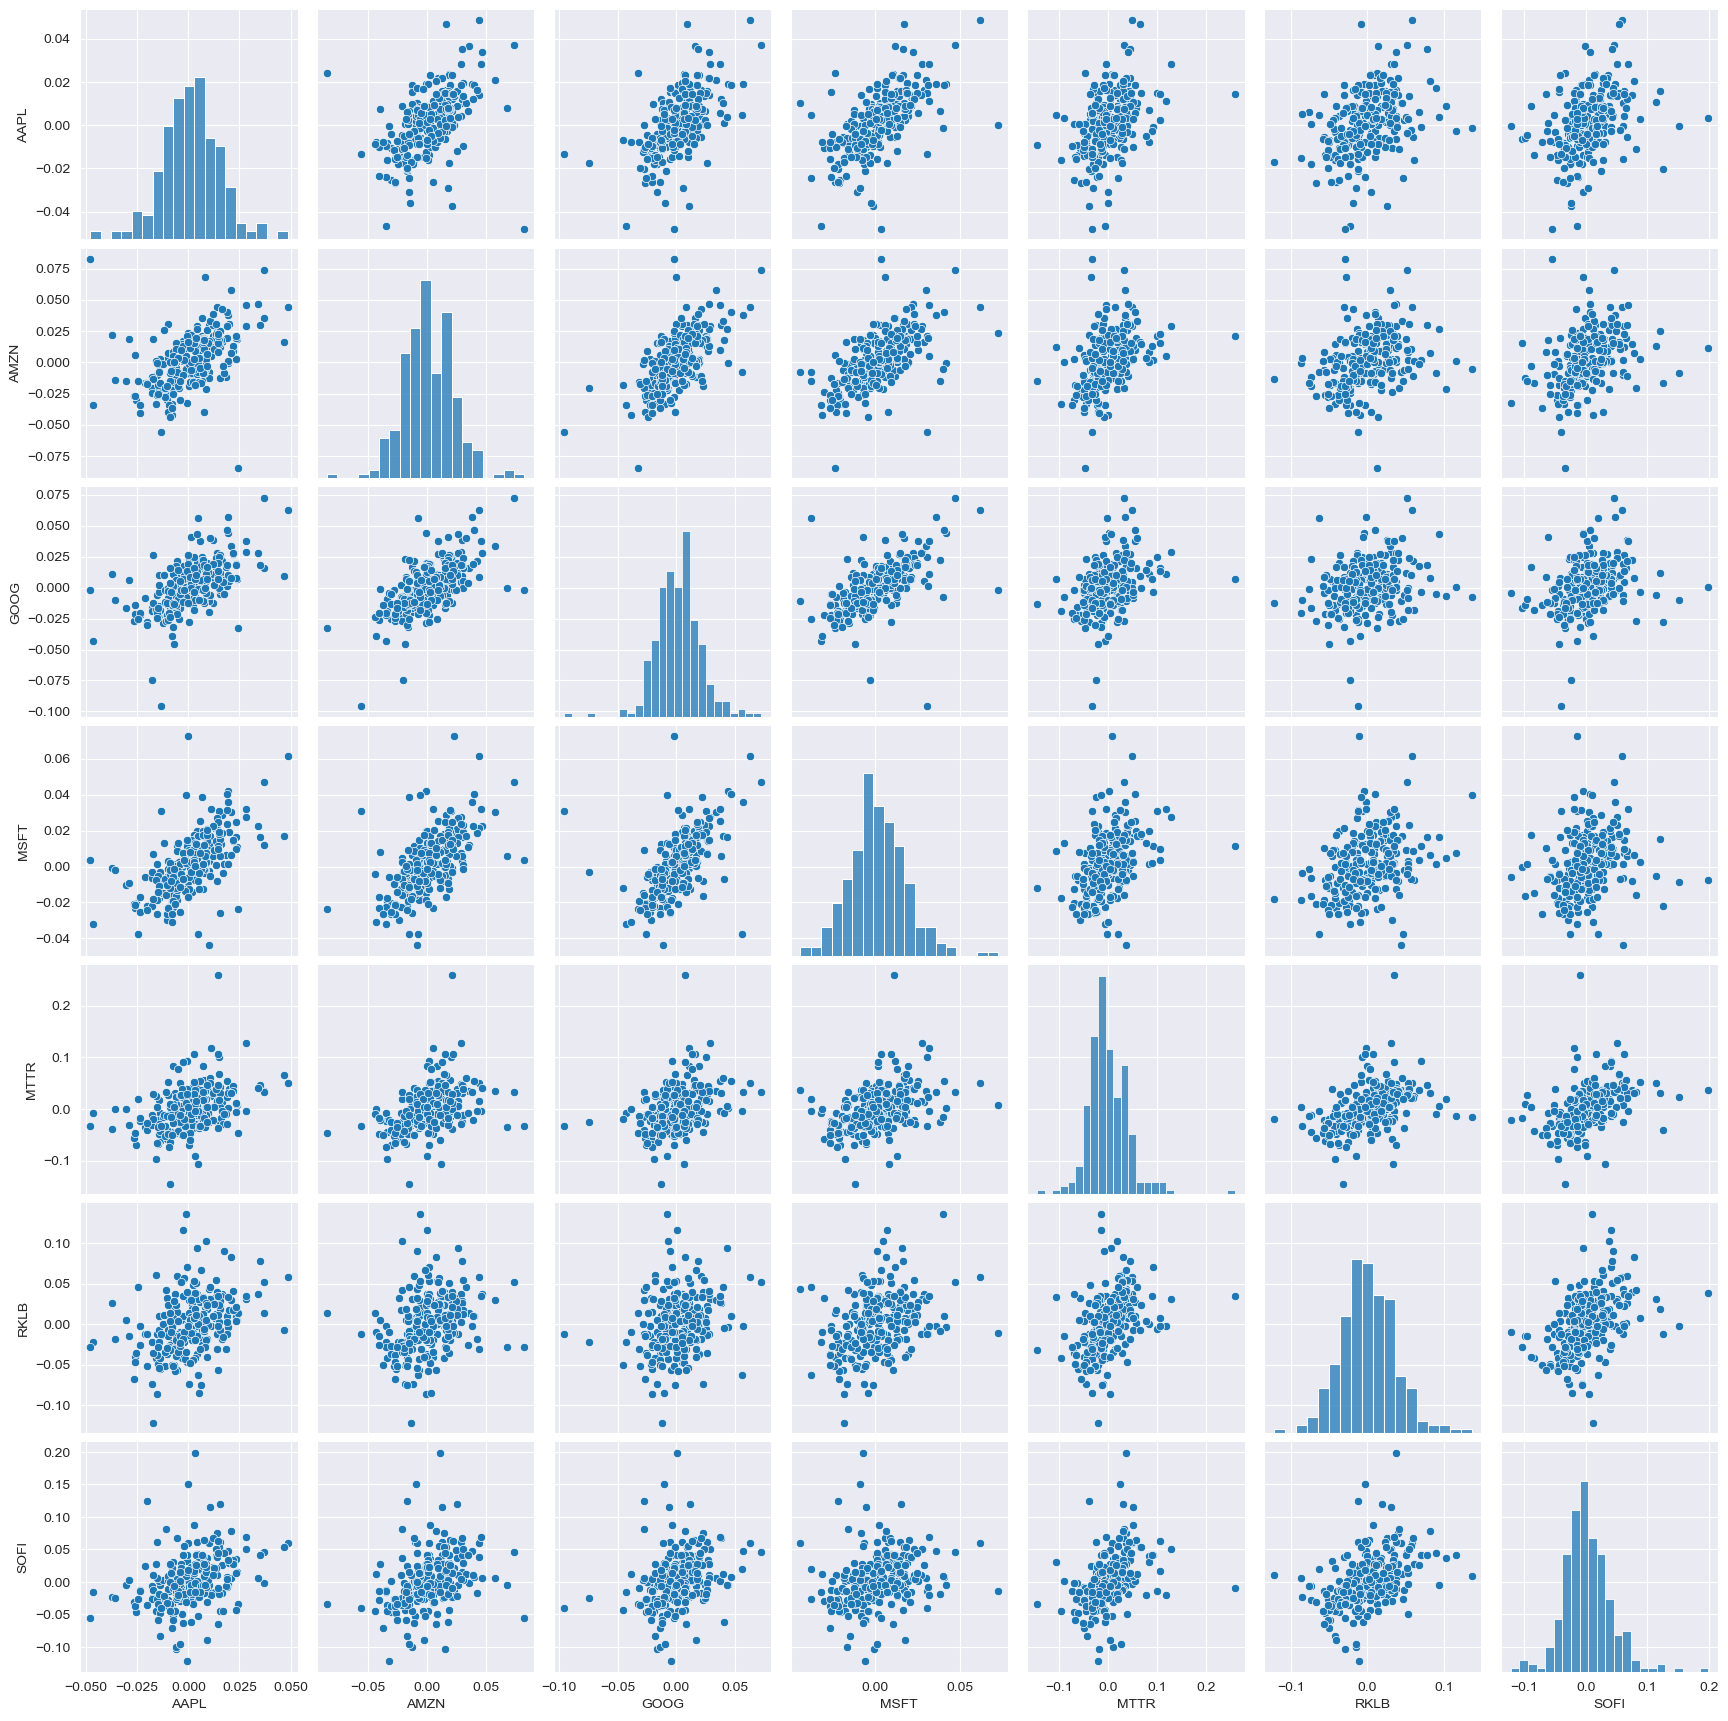

In [18]:
sns.pairplot(tech_rets.dropna())

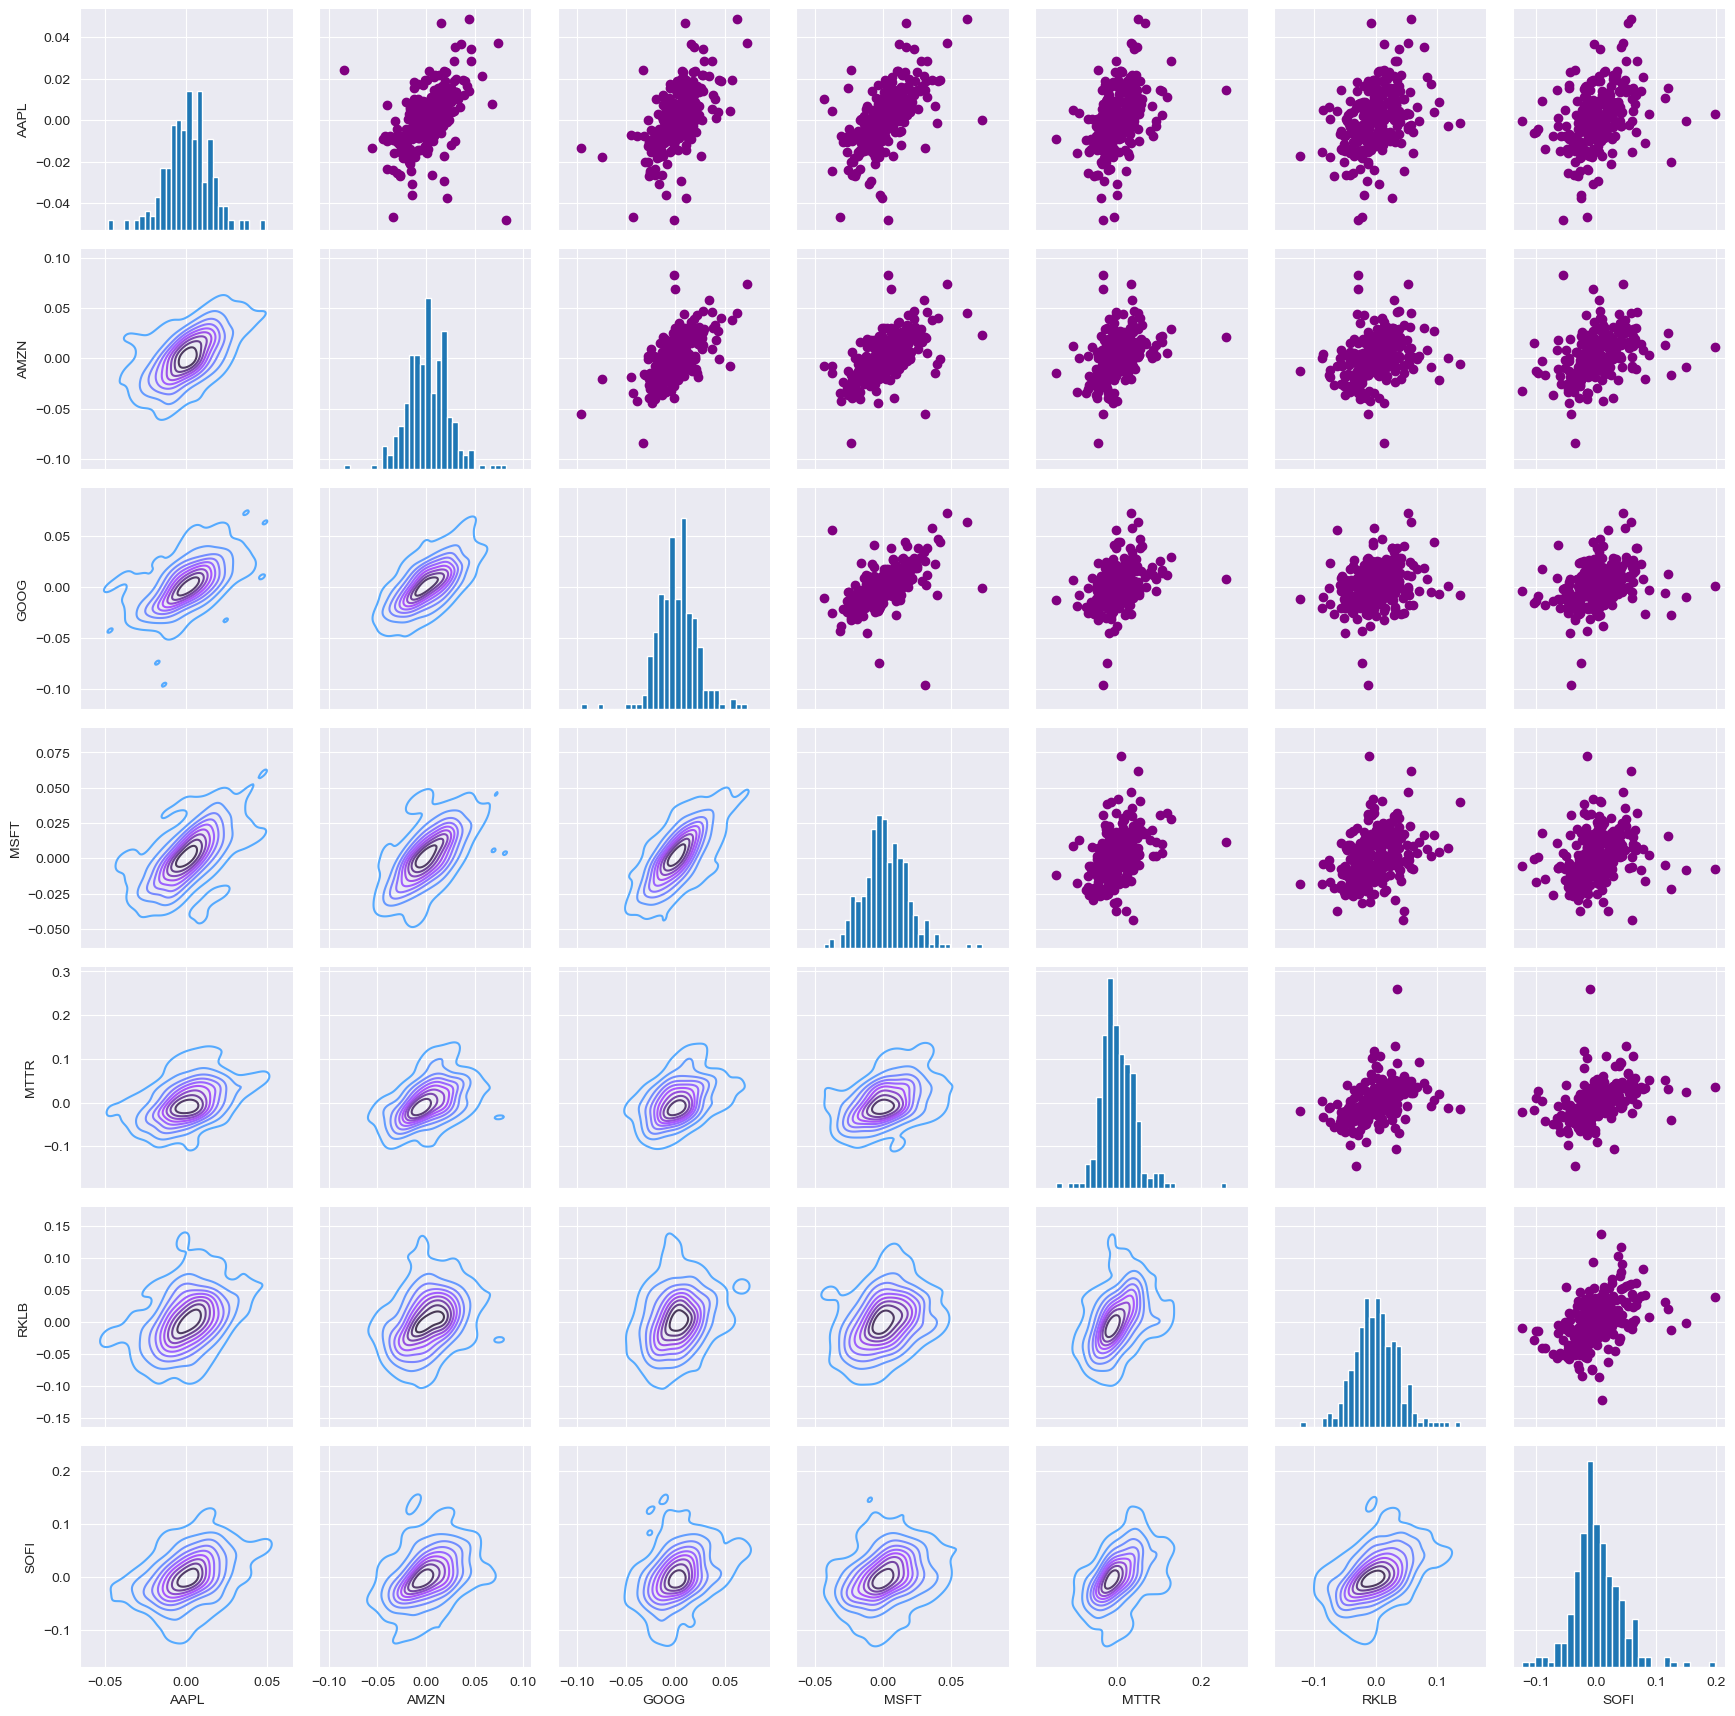

In [19]:
#based on the returns of the tech stocks - creating the pairgrid and applying different plot methods for upper/lower/diag 
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

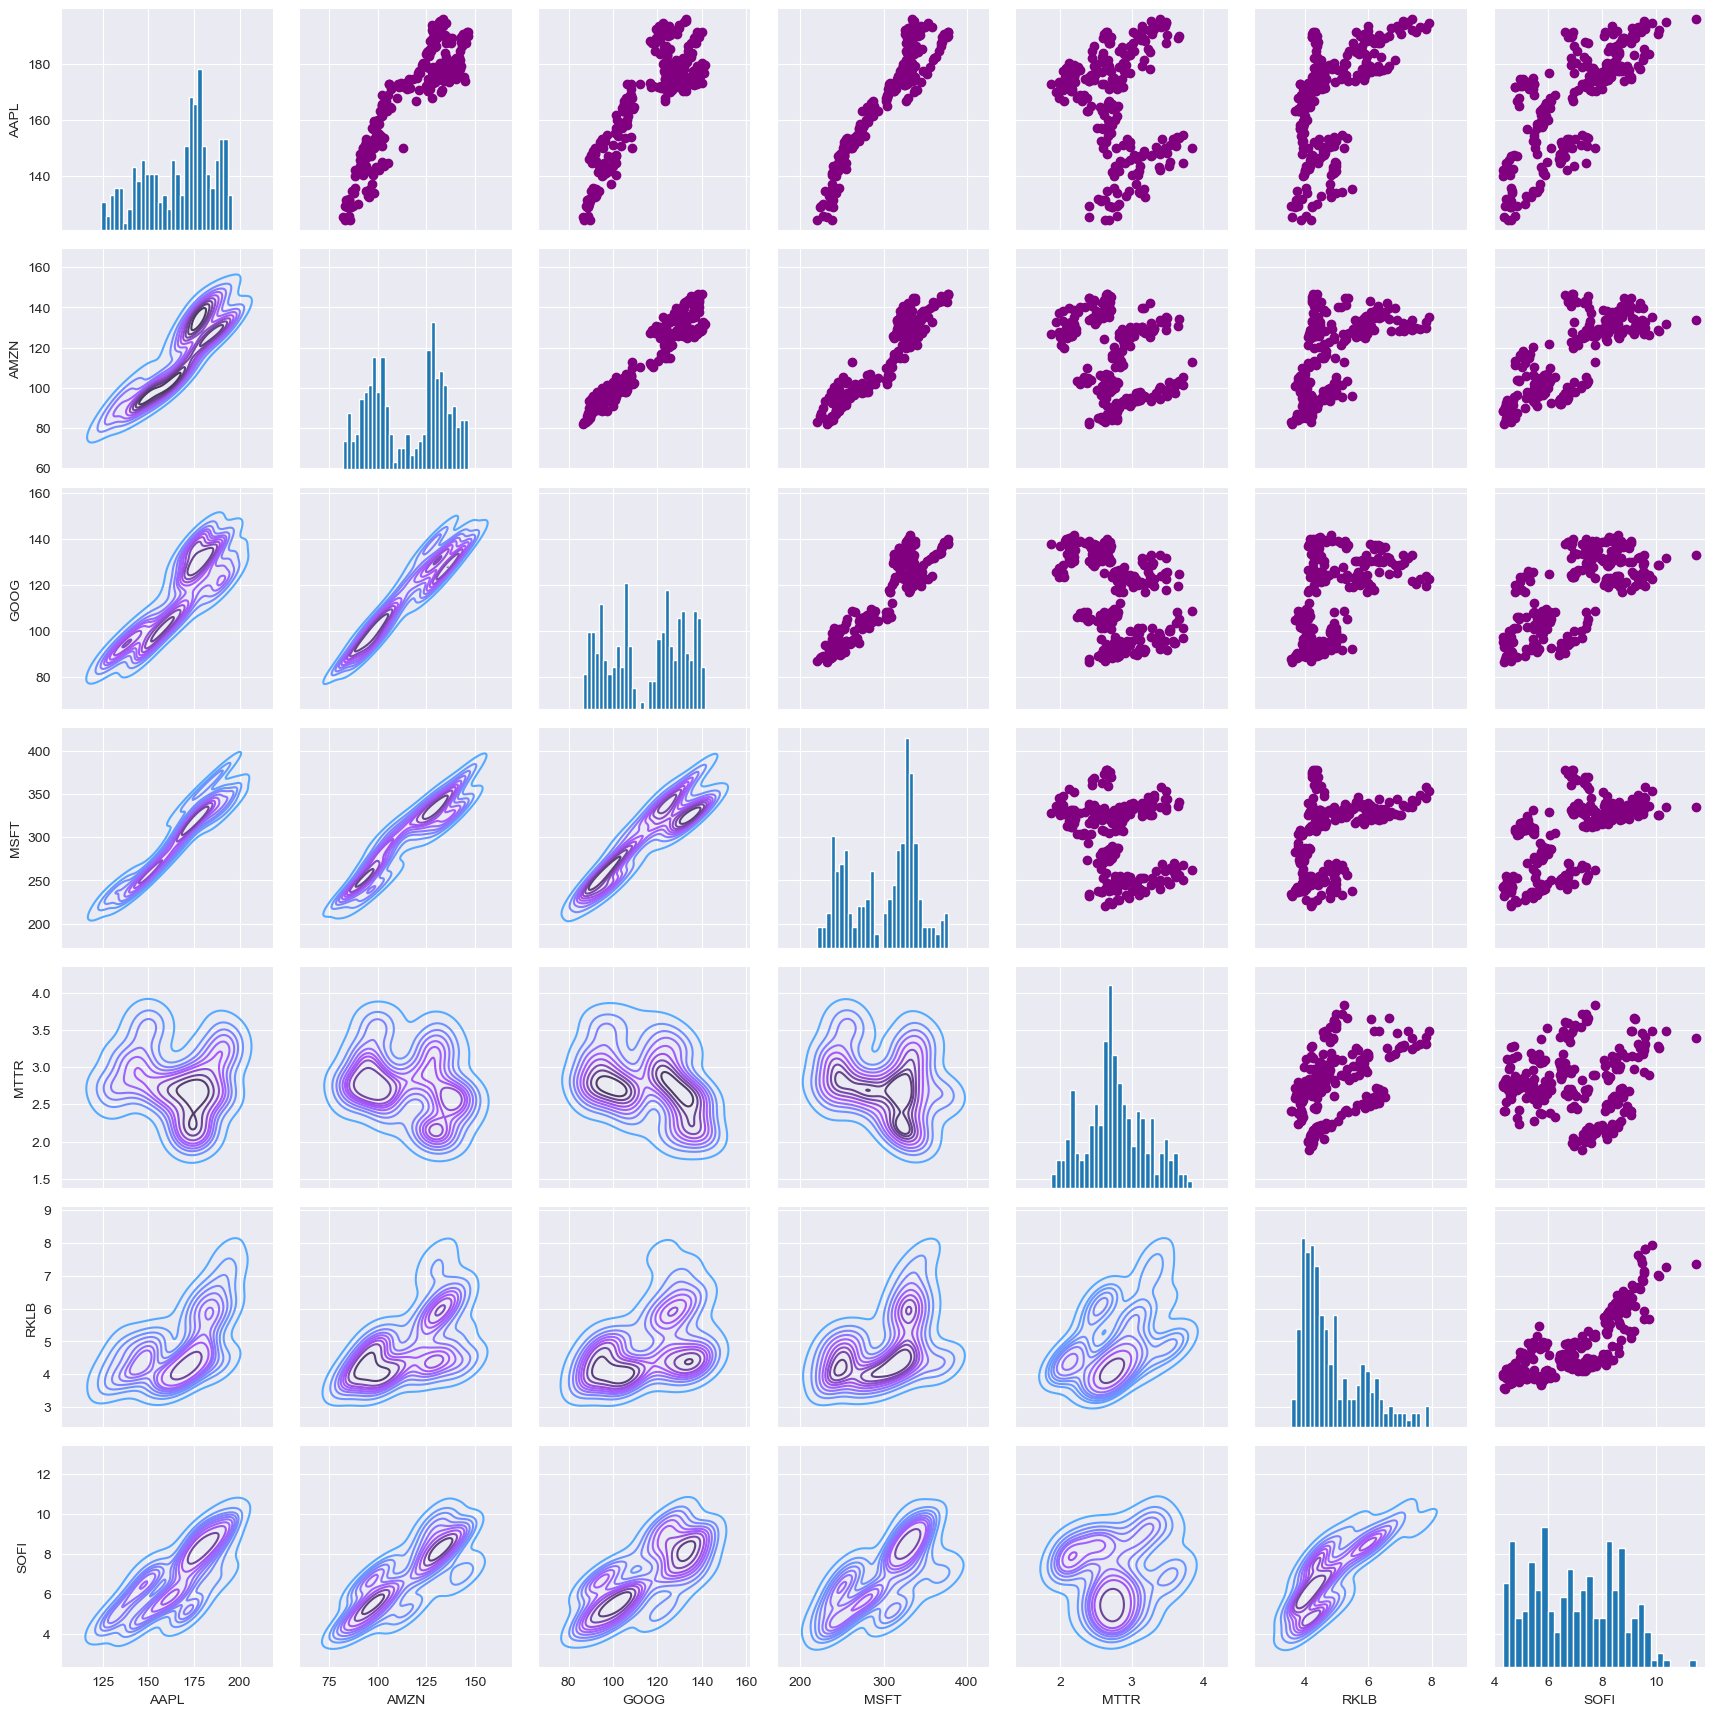

In [20]:
# based on the daily closing data frame 
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

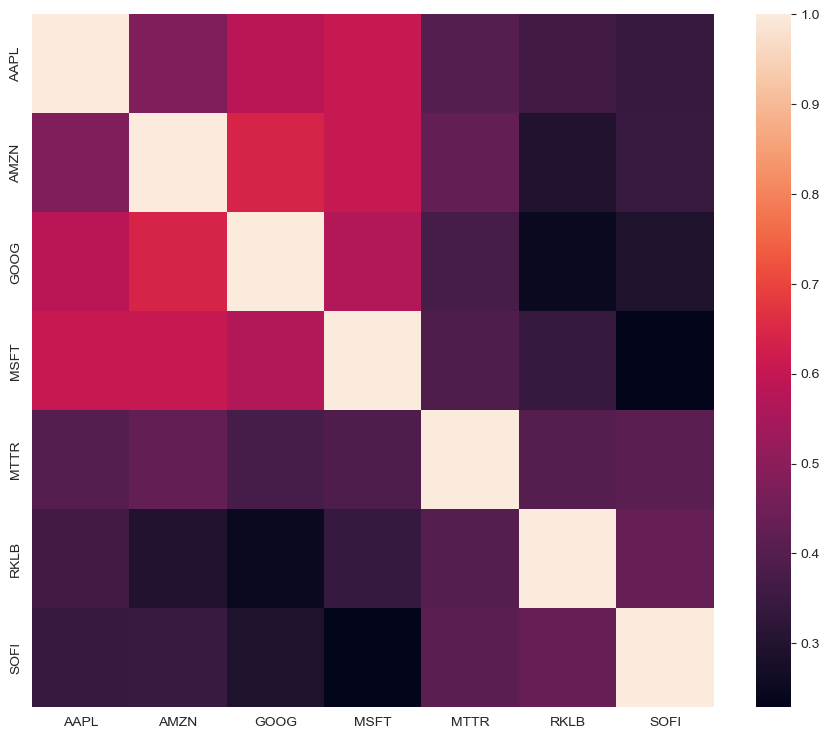

In [21]:
corr = tech_rets.corr()

f, ax = plt.subplots(figsize=(11,9))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr)#mask=mask,

#sns.heatmap(tech_rets.dropna(),annot=True)

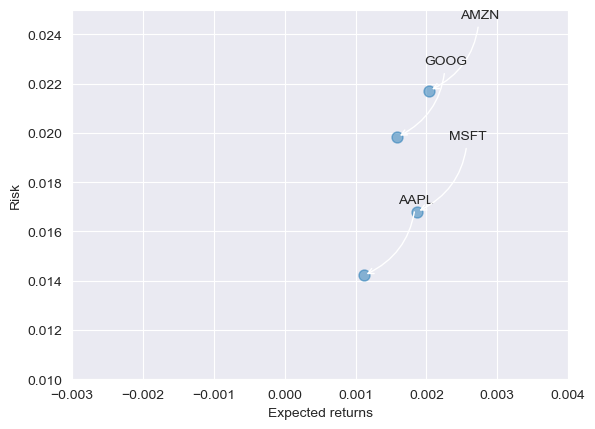

In [22]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))

<Axes: xlabel='Daily Return', ylabel='Count'>

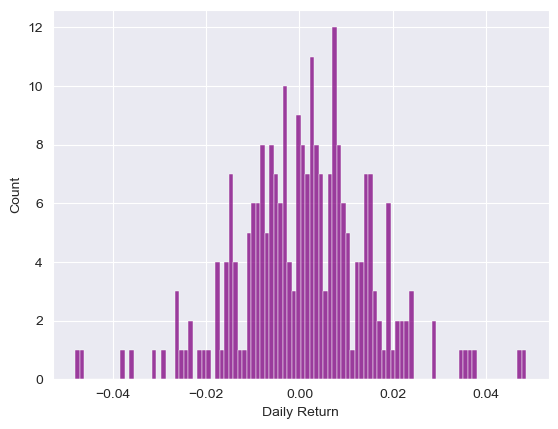

In [23]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [24]:
rets.head()

,AAPL,AMZN,GOOG,MSFT,MTTR,RKLB,SOFI
Date,,,,,,,
2022-11-28,-0.026264,0.005781,-0.013832,-0.023153,-0.048930,-0.040670,-0.032609
2022-11-29,-0.021148,-0.016285,-0.008416,-0.005915,-0.035370,-0.012469,0.024719
2022-11-30,0.048594,0.044579,0.062971,0.061624,0.050000,0.058081,0.059211
2022-12-01,0.001892,-0.010773,-0.001676,-0.001764,0.041270,0.007160,-0.018634
2022-12-02,-0.003371,-0.014346,-0.004443,0.001296,-0.048781,0.007109,-0.008439


In [25]:
rets['AAPL'].quantile(0.05) #95% of the time the worst lose = x

-0.022385869522309636

In [26]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [27]:
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):

        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))

        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price


In [28]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800
2022-11-28,97.199997,97.830002,95.889999,96.250000,96.250000,19974500
2022-11-29,96.000000,96.389999,94.389999,95.440002,95.440002,20220000
2022-11-30,95.120003,101.449997,94.669998,101.449997,101.449997,39888100
2022-12-01,101.400002,102.589996,100.669998,101.279999,101.279999,21771500


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

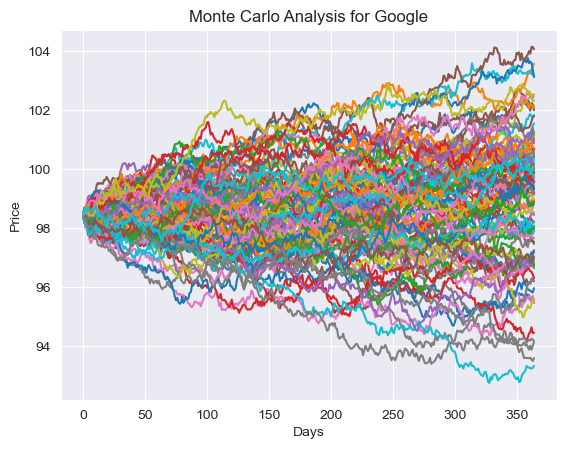

In [29]:
start_price = 98.46

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [30]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

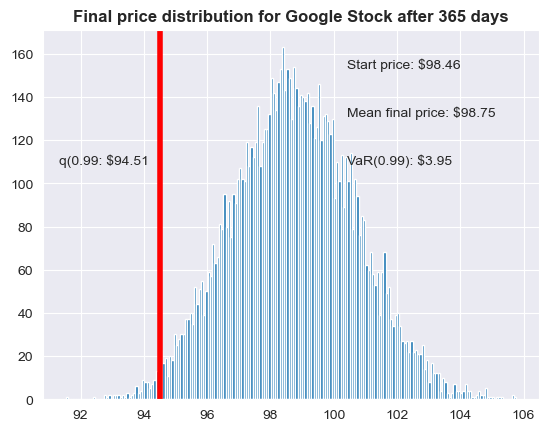

In [31]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s='Start price: $%.2f' %start_price)

plt.figtext(0.6,0.7, 'Mean final price: $%.2f' %simulations.mean())

plt.figtext(0.6,0.6,'VaR(0.99): $%.2f' %(start_price - q,))

plt.figtext(0.15,0.6, 'q(0.99: $%.2f' %q)

plt.axvline(x=q,linewidth=4,color='r')

plt.title(u'Final price distribution for Google Stock after %s days' %days, weight='bold');